In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

### Make fake dataset

In [5]:
def make_dataset(size: int=100, na_percentage: float=0.2, n_feat=8):
    X, y = make_classification(n_samples=size, n_features=n_feat, n_classes=2)
    df = pd.DataFrame(X, columns=[c for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[:n_feat]])
    df["target"]:np.ndarray = y
    for col in df.columns:
        index_sampled = df[col].sample(int(size * (na_percentage + np.random.randint(-3,3)/100))).index
        df.loc[index_sampled, col] = pd.NA # type: ignore
    
    return df


In [6]:
data = make_dataset()
data.head()

,A,B,C,D,E,F,G,H,target
0,1.052816,NaN,-0.904638,-0.774830,NaN,NaN,NaN,-2.013570,0.0
1,0.713330,2.029396,0.180542,1.011846,0.788575,-1.741237,1.207288,0.756678,0.0
2,1.340263,0.469565,0.876741,-1.346308,NaN,-2.040843,0.912660,1.143914,0.0
3,NaN,1.477530,-0.082733,0.701579,0.793035,-1.632736,1.083015,0.467479,0.0
4,NaN,-0.942844,-0.743319,0.694226,-1.710680,2.695205,-1.420289,-0.637216,1.0


## Test VEDA

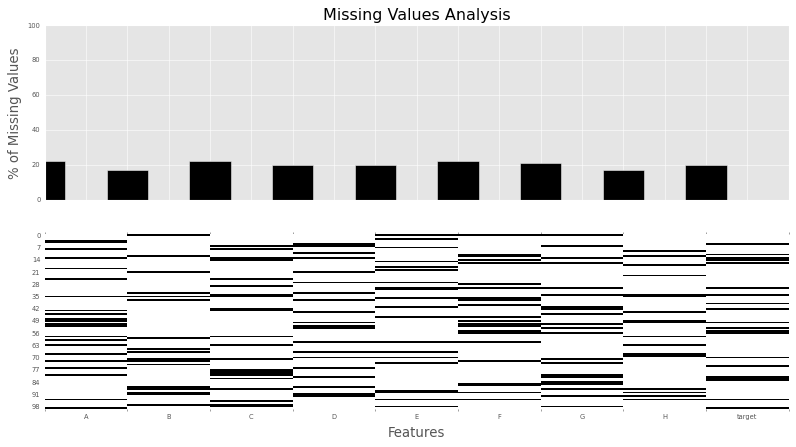

In [34]:
plt.style.use("ggplot")
from veda import viz_missing

viz_missing(df=data, fig_size=(12,6))